Dimensiones de la imagen - Alto: 767, Ancho: 1365, Canales: 3


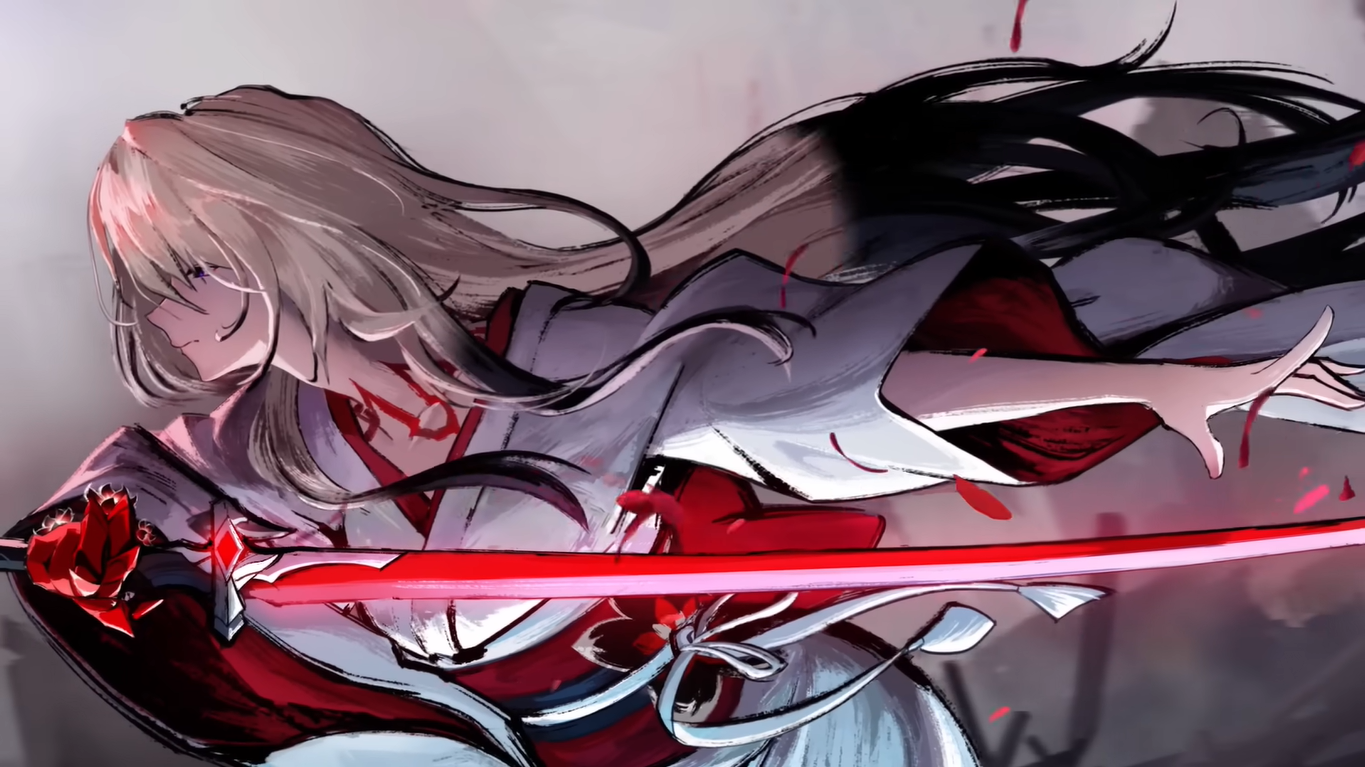

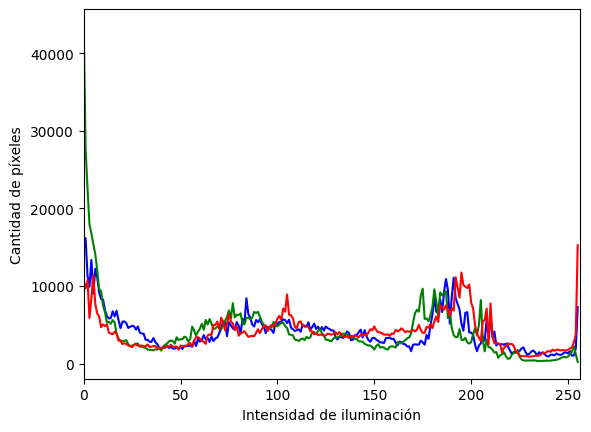

In [ ]:
import cv2
from cv2 import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
# Cargar una imagen
img_OpenCV = cv2.imread('/content/drive/MyDrive/Img/646832.png')
# Dividir la imagen en sus 3 canales (b, g, r):
b, g, r = cv2.split(img_OpenCV)
h,w,c = img_OpenCV.shape
print("Dimensiones de la imagen - Alto: {}, Ancho: {}, Canales: {}".format(h, w, c))
cv2_imshow(img_OpenCV)
# Arreglo para gua de los colores
colors = ('b','g','r')
for i, c in enumerate(colors):
  hist = cv2.calcHist([img_OpenCV], [i], None, [256], [0, 256])
  plt.plot(hist, color = c)
  plt.xlim([0,256])
# Configuracion de los Ejes
plt.xlabel('Intensidad de iluminación')
plt.ylabel('Cantidad de píxeles')
# Guardar el plot en formato pdf utilizando MatPlotLib
plt.savefig('/content/drive/MyDrive/imgHistograma.pdf', dpi=600, bbox_inches='tight')
# Mostrar el Histograma
plt.show()


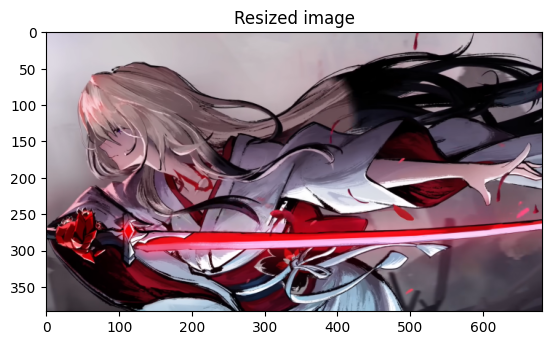

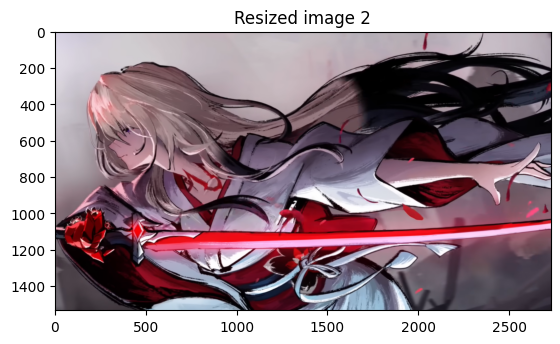

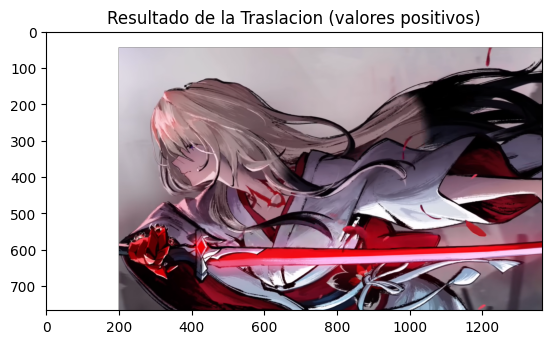

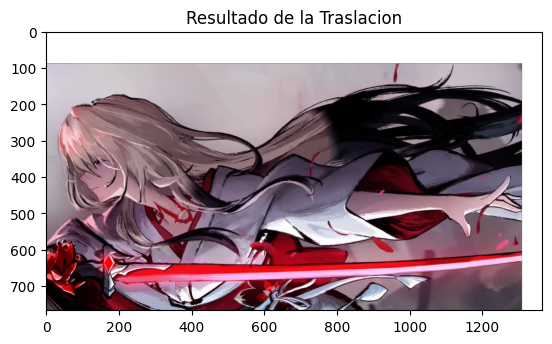

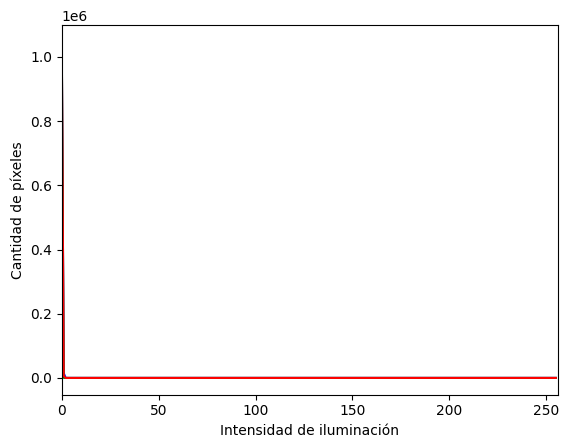

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
# Cargar una imagen
image = plt.imread('/content/drive/MyDrive/Img/646832.png')
def show_with_matplotlib(img, title):
 """Mostrar las imagenes usando las capacidades de MatPlotLib"""
 # Convertir imagen BGR a RGB
 img_RGB = img[:, :, ::1]
 # Mostrar la imagen con matplotlib:
 plt.imshow(img_RGB)
 plt.title(title)
 plt.show()

# El parametro interpolacion especifica como se calcularan los valores
# de los pxeles en la nueva imagen
# Escalar 0.5 del valor de la imagen original
dst_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
# Obtener las dimensiones de la imagen
height, width = image.shape[:2]
# Aplicacion de un nuevo escalado basados en la imagen original
dst_image_2 = cv2.resize(image, (width * 2, height * 2),interpolation=cv2.INTER_LINEAR)
# Mostrar las imagenes escaladas
show_with_matplotlib(dst_image, 'Resized image')
show_with_matplotlib(dst_image_2, 'Resized image 2')
# Matriz de Transformacion
M = np.float32([[1, 0, 200], [0, 1, 60]])
# Esta matriz se pasa a la funcion cv2.warpAffine():
dst_image = cv2.warpAffine(image, M, (width, height))
# Mostrar el resultado
show_with_matplotlib(dst_image,'Resultado de la Traslacion (valores positivos)')
# La matriz tambien puede contener valores negativos
M = np.float32([[1, 0, -55], [0, 1, 69]])
dst_image = cv2.warpAffine(image, M, (width, height))

# Mostrar el resultado
show_with_matplotlib(dst_image,'Resultado de la Traslacion')

# Arreglo para gua de los colores
colors = ('b','g','r')
for i, c in enumerate(colors):
  hist = cv2.calcHist([dst_image], [i], None, [256], [0, 256])
  plt.plot(hist, color = c)
  plt.xlim([0,256])
# Configuracion de los Ejes
plt.xlabel('Intensidad de iluminación')
plt.ylabel('Cantidad de píxeles')
# Guardar el plot en formato pdf utilizando MatPlotLib
plt.savefig('/content/drive/MyDrive/imgHistograma.pdf', dpi=600, bbox_inches='tight')
# Mostrar el Histograma
plt.show()


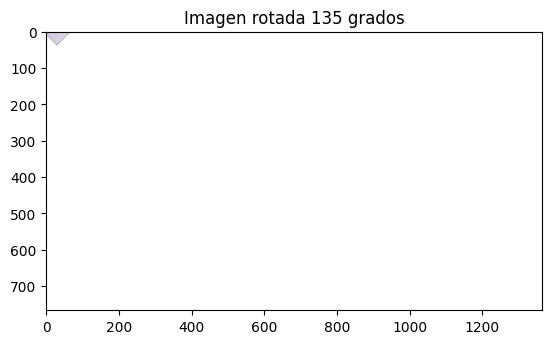

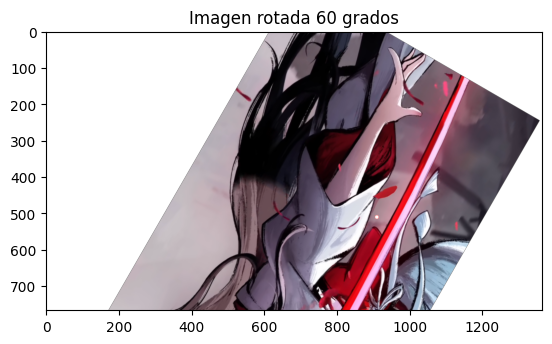

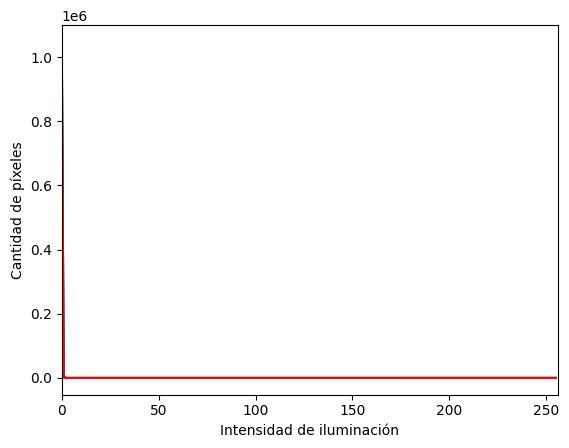

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
# Cargar una imagen
image = plt.imread('/content/drive/MyDrive/Img/646832.png')
def show_with_matplotlib(img, title):
 """Mostrar las imagenes usando las capacidades de MatPlotLib"""
 # Convertir imagen BGR a RGB
 img_RGB = img[:, :, ::1]
 # Mostrar la imagen con matplotlib:
 plt.imshow(img_RGB)
 plt.title(title)
 plt.show()

height, width = image.shape[:2]
# Creacion de Matriz de Rotacion para 180 grados
# getRotationMatrix2D(Point2f center, double angle, double scale)
M = cv2.getRotationMatrix2D((width / 60, height / 60), 135, 1)
dst_image = cv2.warpAffine(image, M, (width, height))
# Mostrar el centro de rotacion
cv2.circle(dst_image, (round(width / 2.0), round(height / 2.0)),5, (255, 0, 0), -1)
show_with_matplotlib(dst_image, 'Imagen rotada 135 grados')
# En eset caso cambiamos el centro de rotacion
M = cv2.getRotationMatrix2D((width / 1.5, height / 1.5), 60, 1)
dst_image = cv2.warpAffine(image, M, (width, height))
# Mostrar el centro de rotacion y rotar 30 grados
cv2.circle(dst_image, (round(width / 1.5), round(height / 1.5)),5, (255, 0, 0), -1)
show_with_matplotlib(dst_image, 'Imagen rotada 60 grados')

# Arreglo para gua de los colores
colors = ('b','g','r')
for i, c in enumerate(colors):
  hist = cv2.calcHist([dst_image], [i], None, [256], [0, 256])
  plt.plot(hist, color = c)
  plt.xlim([0,256])
# Configuracion de los Ejes
plt.xlabel('Intensidad de iluminación')
plt.ylabel('Cantidad de píxeles')
# Guardar el plot en formato pdf utilizando MatPlotLib
plt.savefig('/content/drive/MyDrive/imgHistograma.pdf', dpi=600, bbox_inches='tight')
# Mostrar el Histograma
plt.show()


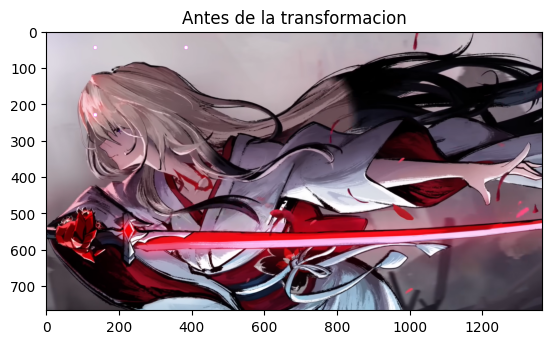

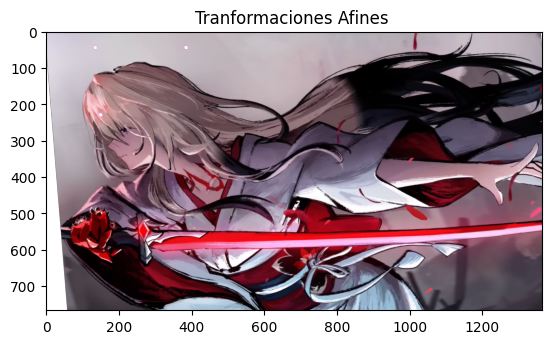

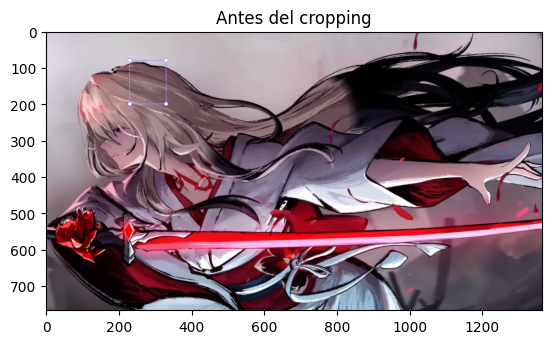

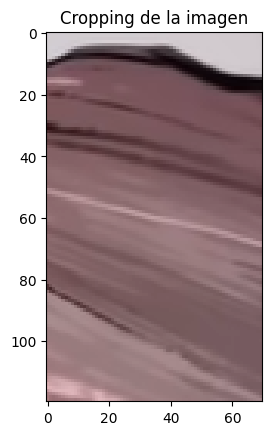

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
# Cargar una imagen
image = plt.imread('/content/drive/MyDrive/Img/646832.png')
def show_with_matplotlib(img, title):
 """Mostrar las imagenes usando las capacidades de MatPlotLib"""
 # Convertir imagen BGR a RGB
 img_RGB = img[:, :, ::1]
 # Mostrar la imagen con matplotlib:
 plt.imshow(img_RGB)
 plt.title(title)
 plt.show()

height, width = image.shape[:2]
# En una copia de la imagen se dibujan los puntos de referencia
image_points = image.copy()
cv2.circle(image_points, (135, 45), 5, (255, 0, 255), -1)
cv2.circle(image_points, (385, 45), 5, (255, 0, 255), -1)
cv2.circle(image_points, (135, 230), 5, (255, 0, 255), -1)
# Mostrar los puntos de referencia
show_with_matplotlib(image_points, 'Antes de la transformacion')
# Se crean 2 arreglos con los puntos de referencia
# y su ubicacion deseada.
pts_1 = np.float32([[135, 45], [385, 45], [135, 230]])
pts_2 = np.float32([[135, 45], [385, 45], [150, 230]])
# Usando getAffineTransform se obtiene la matriz de transformacion
M = cv2.getAffineTransform(pts_1, pts_2)
dst_image = cv2.warpAffine(image_points, M, (width, height))
# Mostrar el resultado:
show_with_matplotlib(dst_image, 'Tranformaciones Afines ')
# Se crea en una copia la imagen para mostrar los puntos
# que forman parte del proceso
image_points = image.copy()
# Mostrar puntos y las lneas que conectan dichos puntos
cv2.circle(image_points, (230, 80), 5, (0, 0, 255), -1)
cv2.circle(image_points, (330, 80), 5, (0, 0, 255), -1)
cv2.circle(image_points, (230, 200), 5, (0, 0, 255), -1)
cv2.circle(image_points, (330, 200), 5, (0, 0, 255), -1)
cv2.line(image_points, (230, 80), (330, 80), (0, 0, 255))
cv2.line(image_points, (230, 200), (330, 200), (0, 0, 255))
cv2.line(image_points, (230, 80), (230, 200), (0, 0, 255))
cv2.line(image_points, (330, 200), (330, 80), (0, 0, 255))
# Mostrar la imagen
show_with_matplotlib(image_points, 'Antes del cropping')
# Para el recorte e utiliza la funcion slicing de numpy:
dst_image = image[80:200, 230:300]
# Mostrar la imagen
show_with_matplotlib(dst_image, 'Cropping de la imagen')